In [1]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
os.getcwd()
os.chdir('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/bin/jupyter')

In [2]:
#group different towns and generate a dictionary for storing the data

def emissions(df_electri):
    df_electri.columns = df_electri.iloc[3]  # Set the specified row as column names
    df_electri = df_electri.iloc[4:]
    df_electri = df_electri.reset_index(drop=True)
    df_electri = df_electri.apply(pd.to_numeric, errors='ignore')
    df_electri = df_electri.dropna(axis=1, how="all")#drop column that only has "NaN" 
    df_electri.insert(1,'County Name',df_town["County Name"])
    resi_elec_sum=df_electri["Residential Electric Usage ( kWh)"].sum()
    resi_natur_sum=df_electri["Residential Natural Gas Usage (ccf)"].sum()
    com_elec_sum=df_electri["Commercial Electric Usage ( kWh)"].sum()
    com_natur_sum=df_electri[" Commercial Natural Gas Usage (ccf)"].sum()
    grouped = df_electri.groupby('County Name')
    grouped_dataframes = {}
    for group_name, group_df in grouped:
        grouped_dataframes[group_name] = group_df
    
    summ=[]

    # Define a function to perform the operation on a DataFrame.
    def resi_elec(df):
        # Replace this with your desired operation on df.
        return df['Residential Electric Usage ( kWh)'].sum()
    def resi_natur(df):
        # Replace this with your desired operation on df.
        return df['Residential Natural Gas Usage (ccf)'].sum()
    def com_elec(df):
        # Replace this with your desired operation on df.
        return df['Commercial Electric Usage ( kWh)'].sum()
    def com_natur(df):
        # Replace this with your desired operation on df.
        return df[' Commercial Natural Gas Usage (ccf)'].sum()

    # Create a dictionary to store the results of the operation for each group.
    resi_elec_results = {}
    resi_natur_results = {}
    com_elec_results = {}
    com_natur_results = {}


    # Iterate through the grouped DataFrames and apply the operation.
    for group_name, group_df in grouped_dataframes.items():
        resi_elec_results[group_name] = resi_elec(group_df)
        resi_natur_results[group_name] = resi_natur(group_df)
        com_elec_results[group_name] = com_elec(group_df)
        com_natur_results[group_name] = com_natur(group_df)


    dictionaries=[resi_elec_results,resi_natur_results,com_elec_results,com_natur_results]
    
    def find_hartford(dictionary):
        if 'Hartford' in dictionary:
            return dictionary['Hartford']
        else:
            return None

    # Iterate through the list of dictionaries and search for 'Hartford'
    for i, dictionary in enumerate(dictionaries, start=1):
        hartford_value = find_hartford(dictionary)
    

    def find_Fairfield(dictionary):
        if 'Fairfield' in dictionary:
            return dictionary['Fairfield']
        else:
            return None

    # Iterate through the list of dictionaries and search for 'Hartford'
    for i, dictionary in enumerate(dictionaries, start=1):
        Fairfield_value = find_Fairfield(dictionary)
        
    # Define a function to search for 'Hartford' in a dictionary
    dictionaries=[resi_elec_results,resi_natur_results,com_elec_results,com_natur_results]
    def find_Middlesex(dictionary):
        if 'Middlesex' in dictionary:
            return dictionary['Middlesex']
        else:
            return None

    # Iterate through the list of dictionaries and search for 'Hartford'
    for i, dictionary in enumerate(dictionaries, start=1):
        Middlesex_value = find_Middlesex(dictionary)
       

   
    def find_New_Haven(dictionary):
        if 'New Haven' in dictionary:
            return dictionary['New Haven']
        else:
            return None

    # Iterate through the list of dictionaries and search for 'Hartford'
    for i, dictionary in enumerate(dictionaries, start=1):
        New_Haven_value = find_New_Haven(dictionary)
      

    # Define a function to search for 'Hartford' in a dictionary
    dictionaries=[resi_elec_results,resi_natur_results,com_elec_results,com_natur_results]
    def find_Tolland(dictionary):
        if 'Tolland' in dictionary:
            return dictionary['Tolland']
        else:
            return None

    # Iterate through the list of dictionaries and search for 'Hartford'
    for i, dictionary in enumerate(dictionaries, start=1):
        Tolland_value = find_Tolland(dictionary)
        
    df = pd.DataFrame(dictionaries)
    #name =['Residential Electric Usage ( kWh)','Residential Natural Gas Usage (ccf)','Commercial Electric Usage ( kWh)','Commercial Natural Gas Usage (ccf)']
    #df.insert(0, 'Utility Consumption', name)
    df['Total']=df["Fairfield"]+df["Hartford"]+df["Litchfield"]+df["Middlesex"]+df["New Haven"]+df["New London"]+df["Tolland"]+df["Windham"]
    HEM = df['Middlesex']+df['New Haven']+df['Tolland']
    NHM = df['New Haven']
    BSN = df['Fairfield']
    df_msa = pd.DataFrame({NHM.name: NHM, HEM.name: HEM, BSN.name: BSN})
    df_msa["Statewide"]=df['Total']
    name =['Residential Electric Usage ( kWh)','Residential Natural Gas Usage (ccf)','Commercial Electric Usage ( kWh)','Commercial Natural Gas Usage (ccf)']
    df_msa.insert(0, 'Utility Consumption', name)
    
        # New column index
    new_columns = ['Utility Consumption', 'New Haven-Milford (NHM)', 'Hartford-East Hartford-Middletown (HEM)','Bridgeport-Stamford-Norwalk (BSN)','Statewide']

    # Assign new column names directly to the .columns attribute
    df_msa.columns = new_columns
    selected_data = df_msa.iloc[[0, 2]]
    sum_result = selected_data.iloc[0,1:]+selected_data.iloc[1,1:]
    msa_result = selected_data.append(sum_result, ignore_index=True)
    msa_result.at[2, 'Utility Consumption'] = 'Total'
    #rows=['Residential Electric Usage (kWh)','Commercial/Industrial Electric Usage (kWh)','Total (kWh)']
    #msa_result.insert(0, 'Utility Consumption', rows)
    Total_EF = 543.852

    ghg_NHM = msa_result['New Haven-Milford (NHM)']/1000*Total_EF/2204.62/1000000 #unit (MMTCO2e)
    ghg_HEM = msa_result['Hartford-East Hartford-Middletown (HEM)']/1000*Total_EF/2204.62/1000000 #unit (MMTCO2e)
    ghg_BSN = msa_result['Bridgeport-Stamford-Norwalk (BSN)']/1000*Total_EF/2204.62/1000000 #unit (MMTCO2e)
    ghg_Statewide = msa_result['Statewide']/1000*Total_EF/2204.62/1000000 #unit (MMTCO2e)
    
    msa_result['GHG Emissions_NHM (MMTCO2e)'] = ghg_NHM
    msa_result['GHG Emissions_HEM (MMTCO2e)'] = ghg_HEM
    msa_result['GHG Emissions_BSN (MMTCO2e)'] = ghg_BSN
    msa_result['GHG Emissions_Statewide (MMTCO2e)'] = ghg_Statewide
    return msa_result

In [3]:
data_dir = 'C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/raw/'

df_town = pd.read_csv(os.path.join(data_dir, 'Town_name_MSA.csv'))

# List all CSV files in the directory
csv_files = [file for file in os.listdir(data_dir) if file.endswith('.csv')]

# Create an empty dictionary to store DataFrames
dataframes = {}

# Loop through the CSV files
for csv_file in csv_files:
    # Extract the year from the file name
    year = csv_file.split(' ')[0]
    
    # Read the CSV file into a DataFrame
    file_path = os.path.join(data_dir, csv_file)
    dataframes[year] = pd.read_csv(file_path)
    
# List of years for which you want to calculate emissions data
years_to_process = ['2022', '2021', '2020', '2019', '2018', '2017', '2016']


df_electri_2022 = dataframes.get('2022')

def get_emissions_data(years):
    # Create an empty dictionary to store emissions data for each year
    emissions_data = {}

    # Iterate over the years and load data for each year
    for year in years:
        #file_name = f'{year Report - Exported on 10-04-2023}.csv'  # Assuming your data files are named like '2022.csv', '2021.csv', etc.
        #file_path = os.path.join(data_dir, file_name)
        df = dataframes.get(year)

        # Calculate emissions data for the current year and store it in the dictionary
        emissions_data[year] = emissions(df)

    return emissions_data

# Call the function to get emissions data for all years
my_dict = get_emissions_data(years_to_process)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 459: invalid start byte

In [53]:
# Extract years and data from the dictionary
years = list(my_dict.keys())
value = list(my_dict.values())

data =value

In [4]:
emissions_data={}
    
for i in range(0,7):
    # Extract columns 'Name' and 'Age' from row 0 (first row)
    row_index = 2
    selected_columns = ['GHG Emissions_NHM (MMTCO2e)', 'GHG Emissions_HEM (MMTCO2e)', 'GHG Emissions_BSN (MMTCO2e)']
    result = data[i].loc[row_index, selected_columns]
    emissions_data[years[i]] = result
    


NameError: name 'data' is not defined

In [5]:
emissions_data

{}

In [6]:
plt.style.use('seaborn')

# Define a custom color palette
custom_colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']

# Extract keys (0 to 5) and corresponding data
keys = list(emissions_data.keys())[::-1]
data = [emissions_data[key] for key in keys]

# Extract column names for the legend
column_names = list(data[0].keys())

# Apply custom colors to the lines
#for i, column_name in enumerate(column_names):
    #plt.plot(keys, [item[column_name] for item in data], label=column_name, color=custom_colors[i])

#for i, column_name in enumerate(column_names):
    #plt.plot(keys, [item[column_name] for item in data], label=column_name, linestyle='-', marker='o', markersize=8)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the background color
plt.gca().set_facecolor('#F4F4F4')
# Add labels and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('GHG Emissions (MMTCO2e)', fontsize=12)
# Move the legend outside the plot area
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
legend_labels = ['New Haven-Milford', 'Hartford-East Hartford-Middletown', 'Bridgeport-Stamford-Norwalk']
# Create a multiple line plot with custom legend labels
for i, column_name in enumerate(column_names):
    plt.plot(keys, [item[column_name] for item in data], label=legend_labels[i],linestyle='-', marker='o', markersize=8)
# Customize the legend labels

plt.legend(fontsize=14)

# Show the plot
#plt.show()
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/total-electricity-emissions.png', dpi=300, bbox_inches='tight')

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [46]:
sector_emissions_data={}
    
for i in range(0,7):
    # Extract columns 'Name' and 'Age' from row 0 (first row)
    row_index = 0
    selected_columns = ['GHG Emissions_NHM (MMTCO2e)', 'GHG Emissions_HEM (MMTCO2e)', 'GHG Emissions_BSN (MMTCO2e)']
    result = data[i].loc[row_index, selected_columns]
    sector_emissions_data[years[i]] = result

In [47]:
sector_emissions_data

{'2022': GHG Emissions_NHM (MMTCO2e)     0.63096
 GHG Emissions_HEM (MMTCO2e)    0.904306
 GHG Emissions_BSN (MMTCO2e)    0.838109
 Name: 0, dtype: object,
 '2021': GHG Emissions_NHM (MMTCO2e)    0.612048
 GHG Emissions_HEM (MMTCO2e)    0.875671
 GHG Emissions_BSN (MMTCO2e)    0.834562
 Name: 0, dtype: object,
 '2020': GHG Emissions_NHM (MMTCO2e)    0.619626
 GHG Emissions_HEM (MMTCO2e)    0.883608
 GHG Emissions_BSN (MMTCO2e)    0.834734
 Name: 0, dtype: object,
 '2019': GHG Emissions_NHM (MMTCO2e)    0.610415
 GHG Emissions_HEM (MMTCO2e)    0.873148
 GHG Emissions_BSN (MMTCO2e)    0.824344
 Name: 0, dtype: object,
 '2018': GHG Emissions_NHM (MMTCO2e)    0.644617
 GHG Emissions_HEM (MMTCO2e)    0.922582
 GHG Emissions_BSN (MMTCO2e)    0.841288
 Name: 0, dtype: object,
 '2017': GHG Emissions_NHM (MMTCO2e)    0.603152
 GHG Emissions_HEM (MMTCO2e)    0.859288
 GHG Emissions_BSN (MMTCO2e)     0.81134
 Name: 0, dtype: object,
 '2016': GHG Emissions_NHM (MMTCO2e)    0.628748
 GHG Emissions_

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_404\2149606184.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


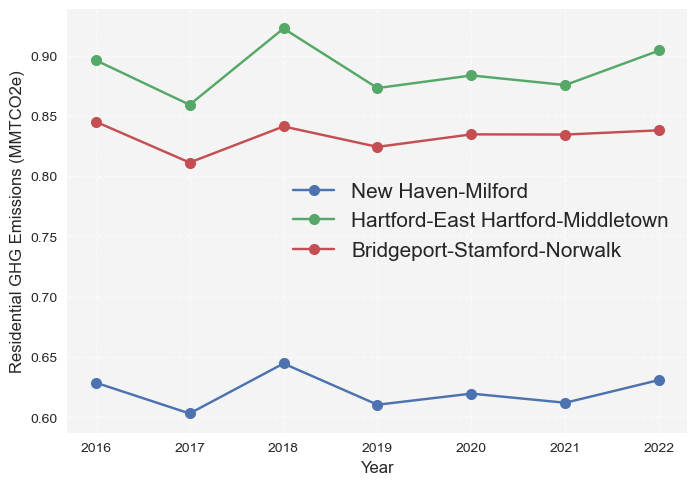

In [49]:
plt.style.use('seaborn')

# Define a custom color palette
custom_colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']

# Extract keys (0 to 5) and corresponding data
keys = list(sector_emissions_data.keys())[::-1]
data = [sector_emissions_data[key] for key in keys]

# Extract column names for the legend
column_names = list(data[0].keys())

# Apply custom colors to the lines
#for i, column_name in enumerate(column_names):
    #plt.plot(keys, [item[column_name] for item in data], label=column_name, color=custom_colors[i])

#for i, column_name in enumerate(column_names):
    #plt.plot(keys, [item[column_name] for item in data], label=column_name, linestyle='-', marker='o', markersize=8)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the background color
plt.gca().set_facecolor('#F4F4F4')
# Add labels and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Residential GHG Emissions (MMTCO2e)', fontsize=12)
# Move the legend outside the plot area
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Create a multiple line plot with custom legend labels
for i, column_name in enumerate(column_names):
    plt.plot(keys, [item[column_name] for item in data], label=legend_labels[i],linestyle='-', marker='o', markersize=8)
# Customize the legend labels
legend_labels = ['New Haven-Milford', 'Hartford-East Hartford-Middletown', 'Bridgeport-Stamford-Norwalk']
plt.legend(fontsize=15)

# Show the plot
#plt.show()
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/residential_electricity_emissions.png', dpi=300, bbox_inches='tight')

In [56]:
sector_emissions_data_1={}
    
for i in range(0,7):
    # Extract columns 'Name' and 'Age' from row 0 (first row)
    row_index = 1
    selected_columns = ['GHG Emissions_NHM (MMTCO2e)', 'GHG Emissions_HEM (MMTCO2e)', 'GHG Emissions_BSN (MMTCO2e)']
    result = data[i].loc[row_index, selected_columns]
    sector_emissions_data_1[years[i]] = result

In [57]:
sector_emissions_data_1

{'2022': GHG Emissions_NHM (MMTCO2e)    0.722667
 GHG Emissions_HEM (MMTCO2e)    0.938482
 GHG Emissions_BSN (MMTCO2e)    0.850076
 Name: 1, dtype: object,
 '2021': GHG Emissions_NHM (MMTCO2e)    0.702893
 GHG Emissions_HEM (MMTCO2e)    0.914548
 GHG Emissions_BSN (MMTCO2e)     0.83706
 Name: 1, dtype: object,
 '2020': GHG Emissions_NHM (MMTCO2e)    0.683755
 GHG Emissions_HEM (MMTCO2e)    0.872928
 GHG Emissions_BSN (MMTCO2e)    0.755577
 Name: 1, dtype: object,
 '2019': GHG Emissions_NHM (MMTCO2e)    0.763801
 GHG Emissions_HEM (MMTCO2e)    0.971495
 GHG Emissions_BSN (MMTCO2e)    0.849796
 Name: 1, dtype: object,
 '2018': GHG Emissions_NHM (MMTCO2e)    0.804491
 GHG Emissions_HEM (MMTCO2e)    1.186267
 GHG Emissions_BSN (MMTCO2e)    0.885426
 Name: 1, dtype: object,
 '2017': GHG Emissions_NHM (MMTCO2e)    0.751876
 GHG Emissions_HEM (MMTCO2e)      1.3718
 GHG Emissions_BSN (MMTCO2e)    0.895129
 Name: 1, dtype: object,
 '2016': GHG Emissions_NHM (MMTCO2e)    0.801325
 GHG Emissions_

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_404\1728342210.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


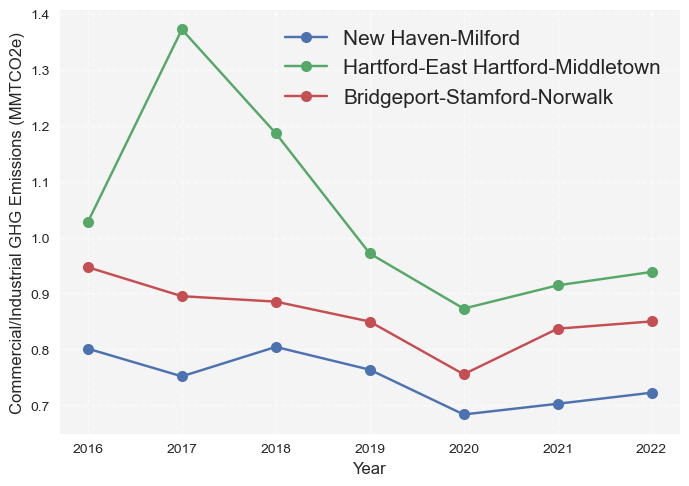

In [59]:
plt.style.use('seaborn')

# Define a custom color palette
custom_colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']

# Extract keys (0 to 5) and corresponding data
keys = list(sector_emissions_data_1.keys())[::-1]
data = [sector_emissions_data_1[key] for key in keys]

# Extract column names for the legend
column_names = list(data[0].keys())

# Apply custom colors to the lines
#for i, column_name in enumerate(column_names):
    #plt.plot(keys, [item[column_name] for item in data], label=column_name, color=custom_colors[i])

#for i, column_name in enumerate(column_names):
    #plt.plot(keys, [item[column_name] for item in data], label=column_name, linestyle='-', marker='o', markersize=8)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the background color
plt.gca().set_facecolor('#F4F4F4')
# Add labels and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Commercial/Industrial GHG Emissions (MMTCO2e)', fontsize=12)
# Move the legend outside the plot area
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Create a multiple line plot with custom legend labels
for i, column_name in enumerate(column_names):
    plt.plot(keys, [item[column_name] for item in data], label=legend_labels[i],linestyle='-', marker='o', markersize=8)
# Customize the legend labels
legend_labels = ['New Haven-Milford', 'Hartford-East Hartford-Middletown', 'Bridgeport-Stamford-Norwalk']
plt.legend(fontsize=15)

# Show the plot
#plt.show()
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/commercial_electricity_emissions.png', dpi=300, bbox_inches='tight')